In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
device="cuda" if torch.cuda.is_available() else "cpu"

In [1]:
import torch
import torch.nn as nn


In [3]:
#Load the data
data=pd.read_csv(r"bigdiabetes.csv")
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
print(data.isna().sum())


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [5]:
print(len(data))

253680


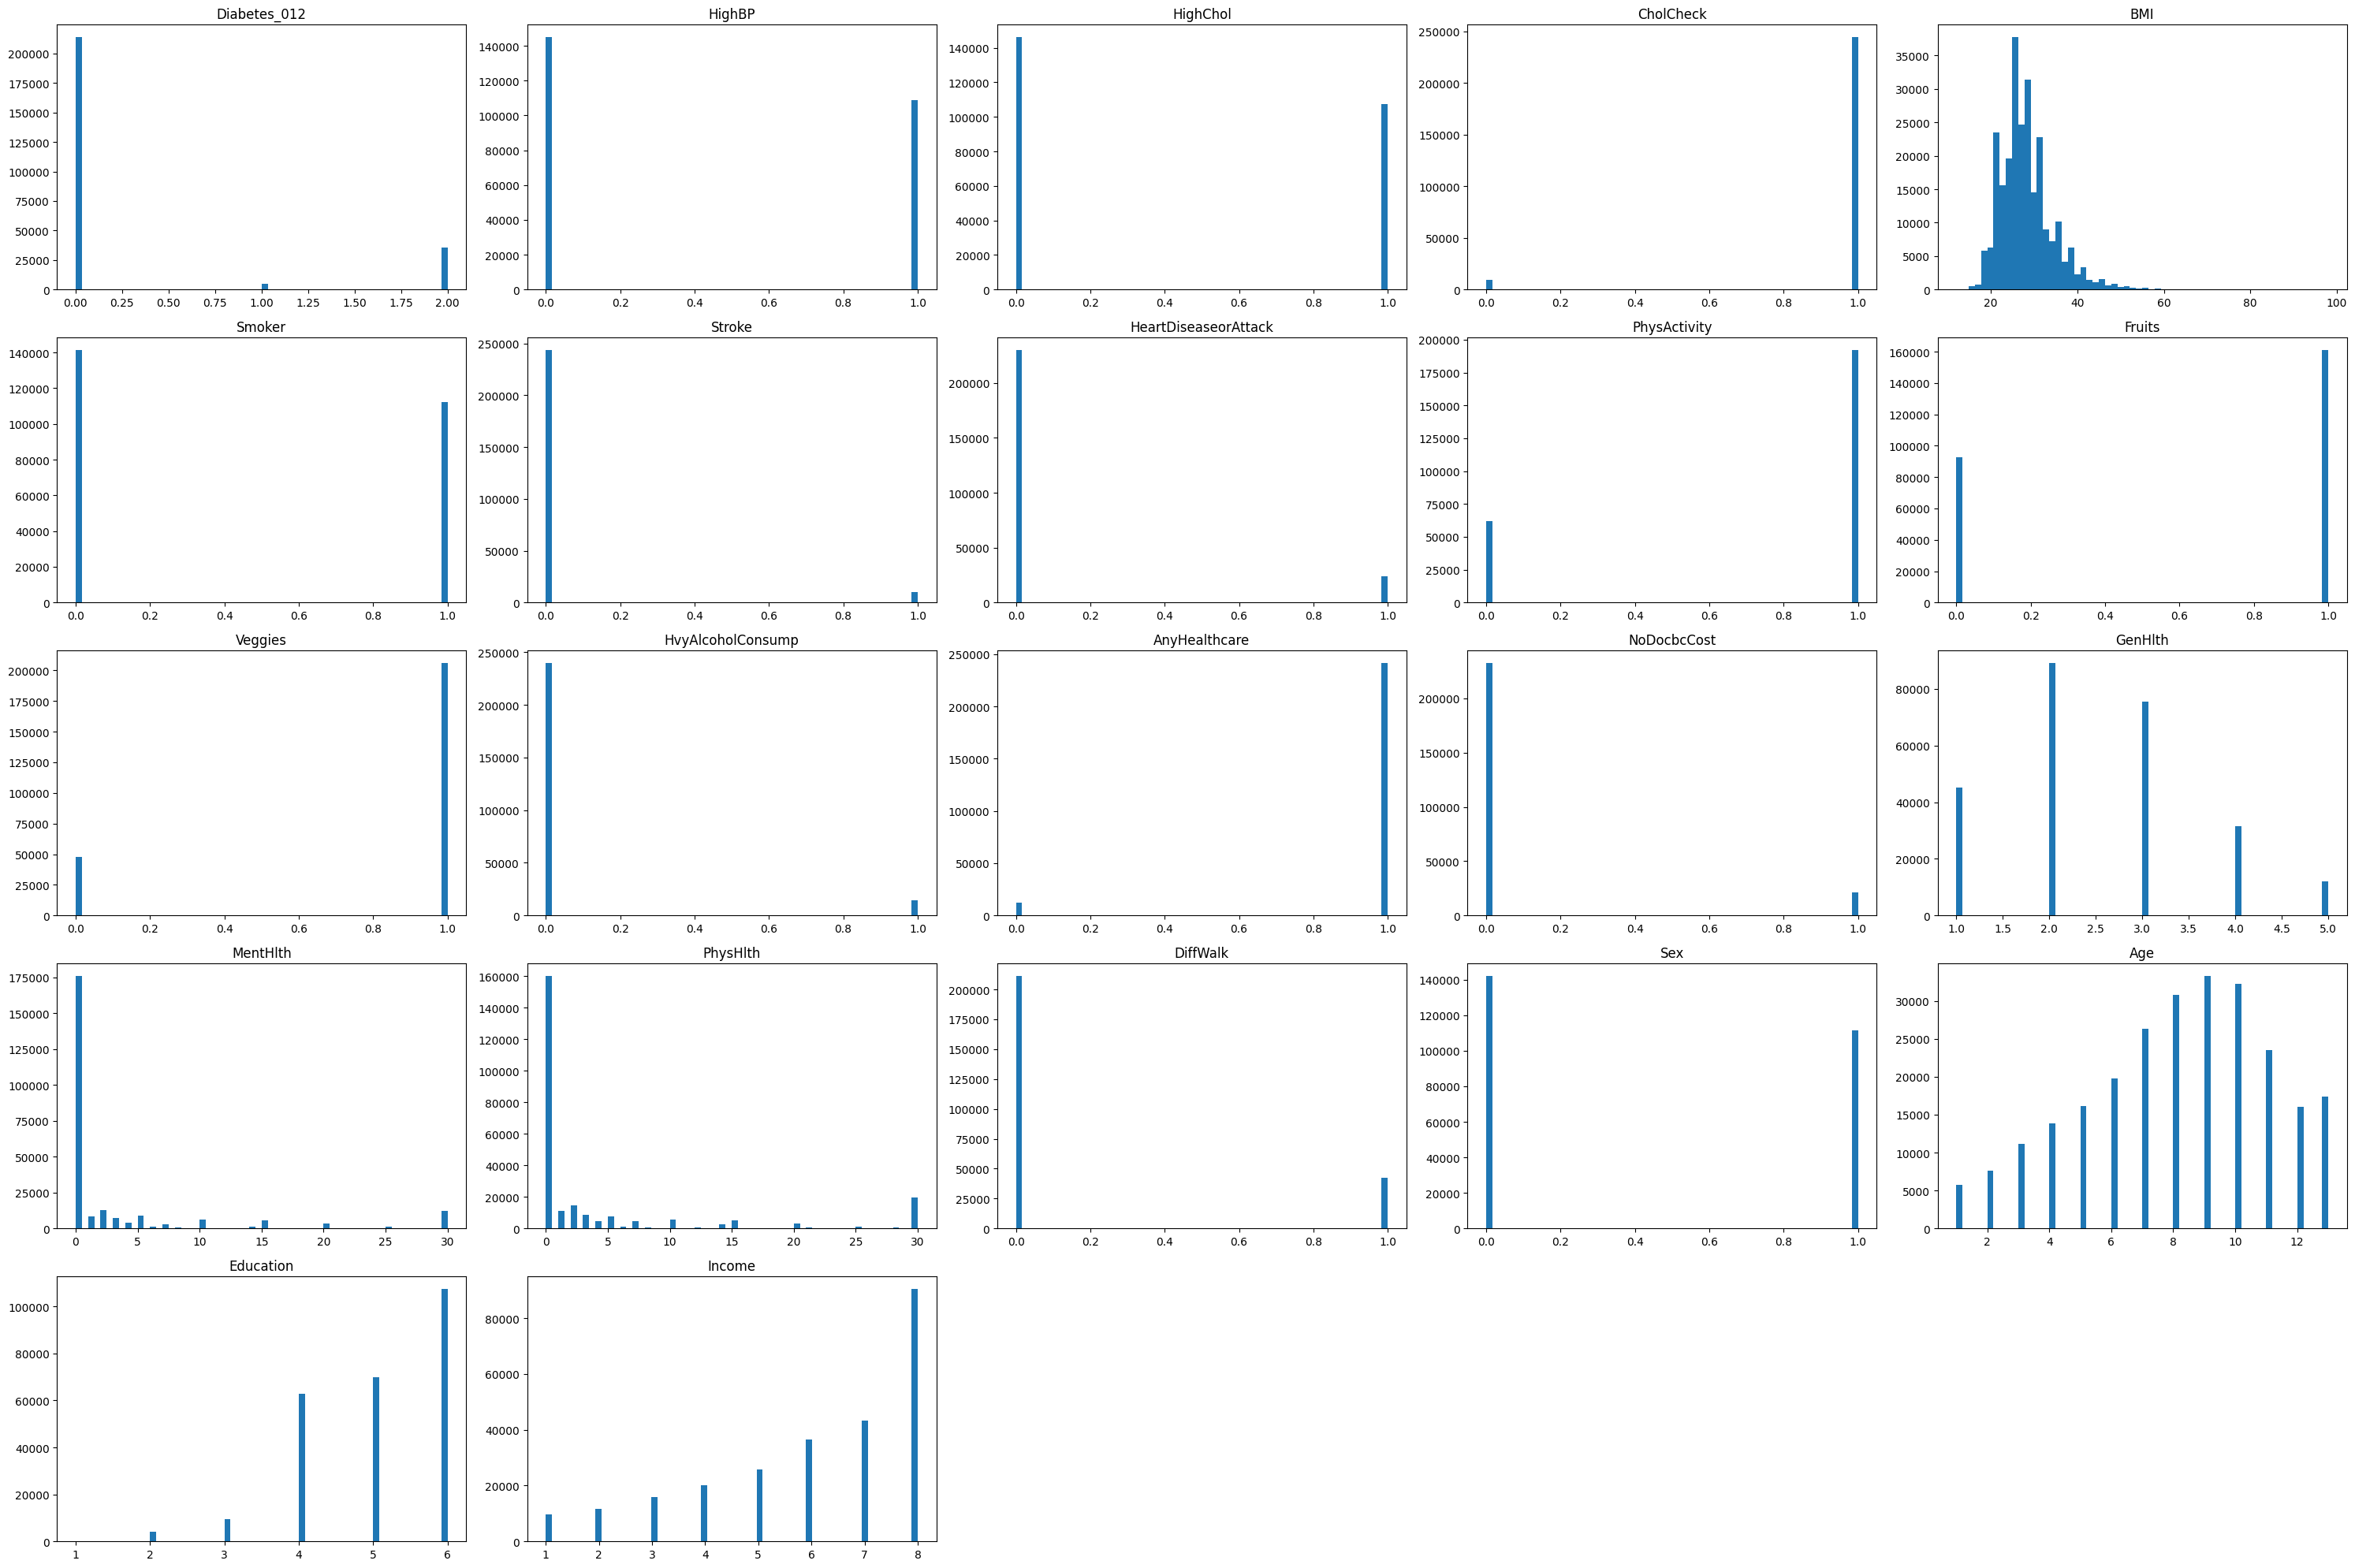

In [6]:
plt.figure(figsize=(30,20))
for i in range(len(data.columns)):
    plt.subplot(5,5,i+1)
    plt.hist(data.iloc[:,i],bins=60)
    plt.title(data.columns[i])

plt.tight_layout()

In [15]:
data_x

array([[ 1.,  1., 40., ...,  1.,  0.,  9.],
       [ 0.,  0., 25., ...,  0.,  0.,  7.],
       [ 1.,  1., 28., ...,  1.,  0.,  9.],
       ...,
       [ 0.,  0., 28., ...,  0.,  0.,  2.],
       [ 1.,  0., 23., ...,  0.,  1.,  7.],
       [ 1.,  1., 25., ...,  0.,  0.,  9.]])

<Axes: >

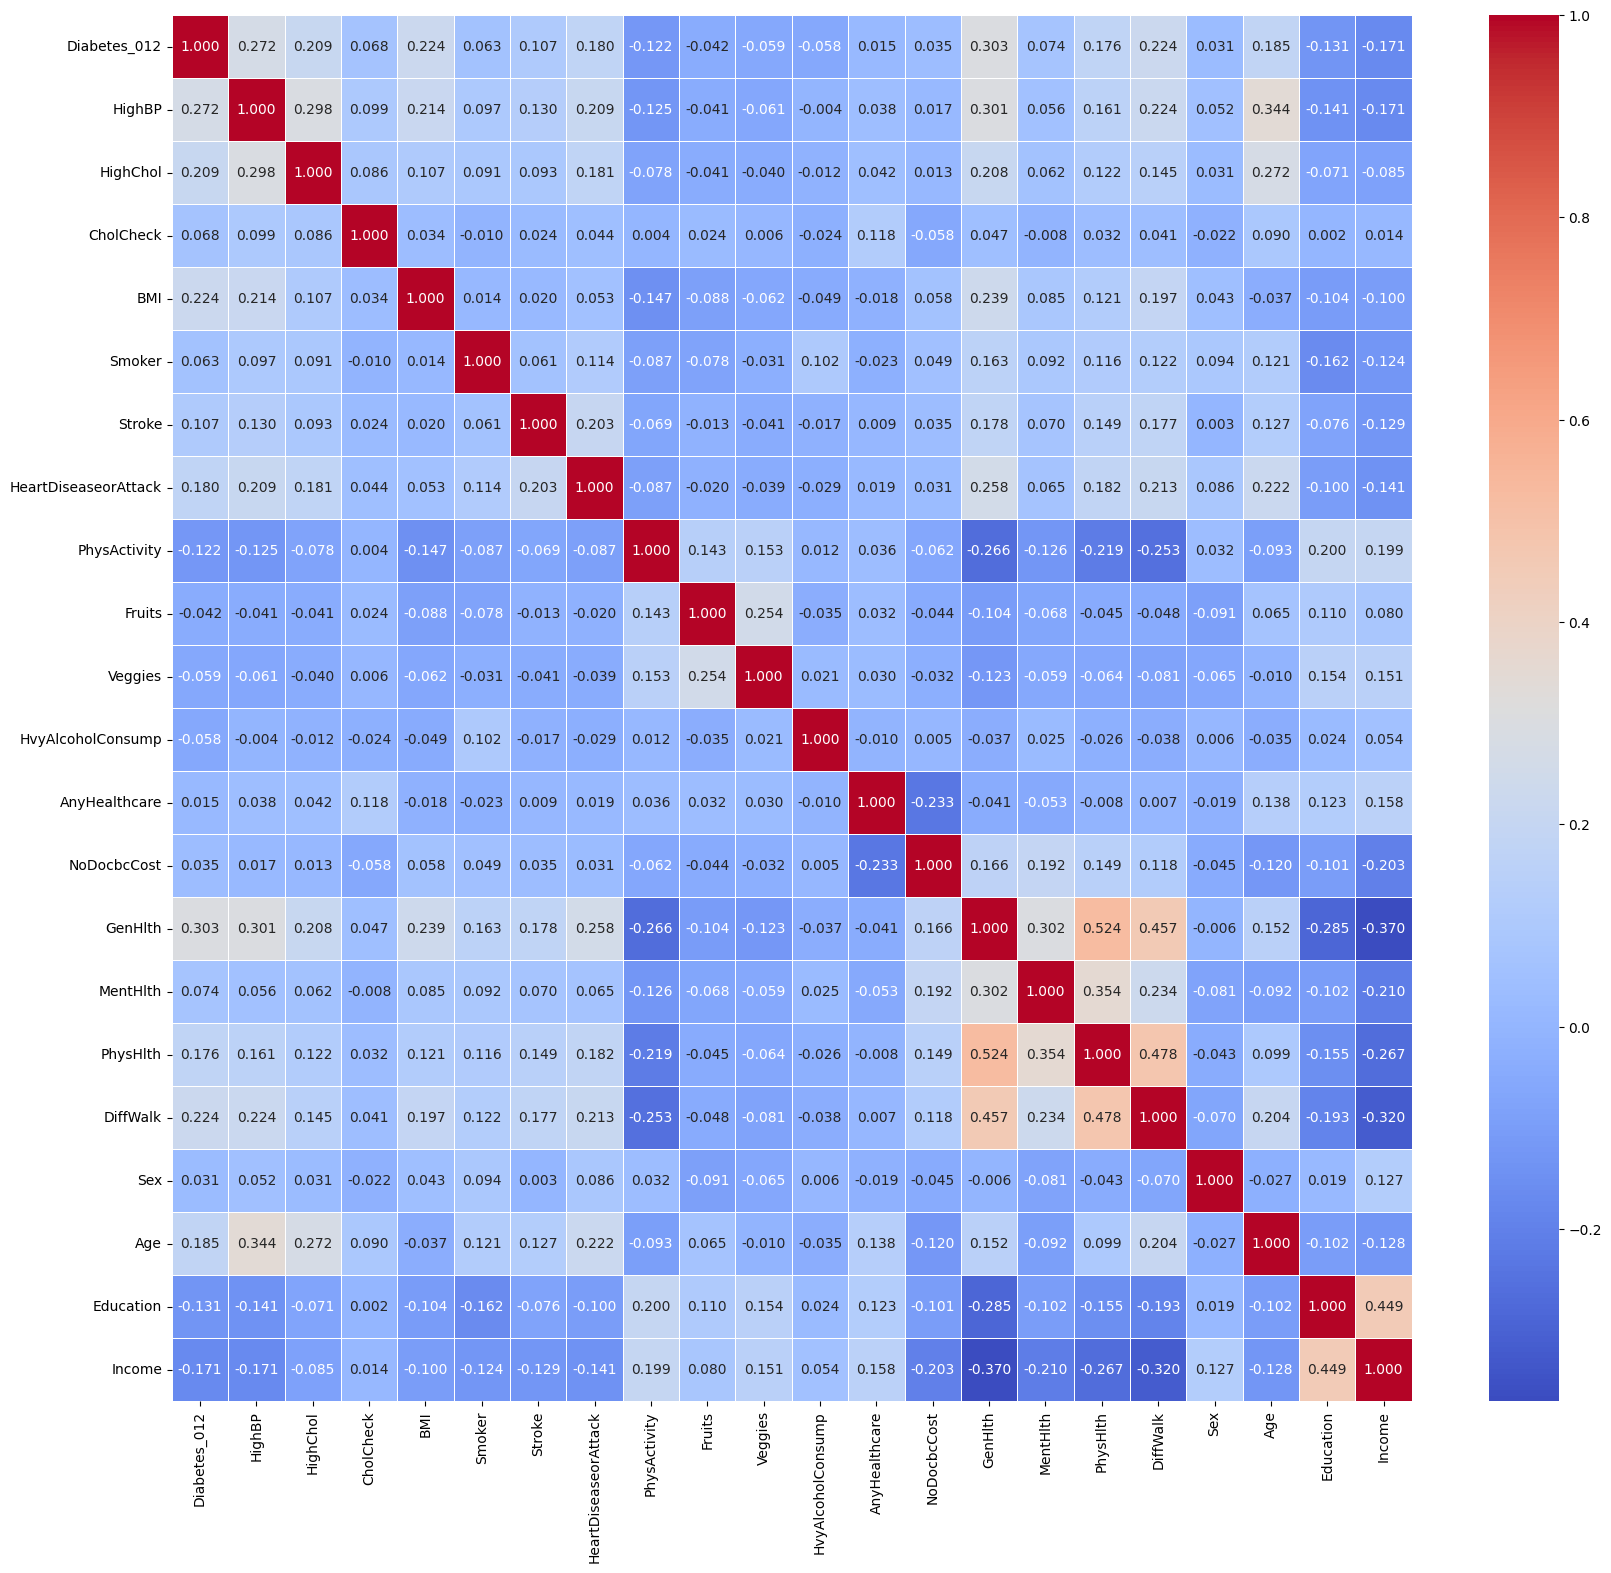

In [16]:
correlation_matrix=data.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt=".3f", linewidths=0.5)


In [17]:
newData = data.drop(columns=["Education", "Income", "MentHlth", "Veggies", "CholCheck", "PhysHlth", "NoDocbcCost","Fruits"])


In [18]:
 newData.head()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,11.0


In [19]:
cols_to_scale=[2,9,12]

In [20]:
data_x=np.array(newData.iloc[:,[i for i in range (len(newData.columns)) if i!=0]])
data_y=np.array(newData.iloc[:,0])

In [ ]:
data_x.DataFrame.head()

In [22]:
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.33,random_state=43)

In [25]:
scaler=StandardScaler()
train_x[:,cols_to_scale]=scaler.fit_transform(train_x[:,cols_to_scale])
test_x[:,cols_to_scale]=scaler.transform(test_x[:,cols_to_scale])



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:

class NeuralNet(nn.Module):
    def __init__(self,lr,n_features,neurons):
        super(NeuralNet,self).__init__()
        self.lr=lr
        self.model=nn.Sequential(nn.Linear(n_features,neurons),
                                nn.ReLU(),
                                 nn.Dropout(p=0.3),
                                nn.Linear(neurons,neurons),
                                nn.ReLU(),
                                 nn.Dropout(p=0.3),
                                nn.Linear(neurons,neurons),
                                nn.ReLU(),
                                 nn.Dropout(p=0.3),
                                nn.Linear(neurons,3)
                                )
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.lr,momentum=0.5)
        self._initialize_weights()

    def forward(self,x):
        return self.model(x)

    def _initialize_weights(self):
        for layer in self.model:
            if isinstance(layer, nn.Linear): 
                nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
                nn.init.zeros_(layer.bias)


In [28]:
pytrain_x=torch.tensor(train_x,device=device)
pytrain_y=torch.tensor(train_y,device=device)
pytest_x=torch.tensor(test_x,device=device)
pytest_y=torch.tensor(test_y,device=device)

In [29]:
pytrain_x=pytrain_x.type(torch.float)
pytrain_y=pytrain_y.type(torch.long)
pytest_x=pytest_x.type(torch.float)
pytest_y=pytest_y.type(torch.long)

In [30]:
print(pytrain_y.unique()) 


tensor([0, 1, 2], device='cuda:0')


In [31]:
models={
    "RandomForest":RandomForestClassifier(),
    "DecisionTree":DecisionTreeClassifier(),
}

for i in range(len(models.values())):
    model=list(models.values())[i]
    model.fit(train_x,train_y)

    y_pred_train=model.predict(train_x)
    y_pred_test=model.predict(test_x)

    print(f"Model : {list(models.keys())[i]}")
    print(f"\n Train  Accuracy :{accuracy_score(y_pred_train,train_y)}")
    print(f"\n Test  Accuracy :{accuracy_score(y_pred_test,test_y)}")
    print("\n---------------\n")

Model : RandomForest

 Train  Accuracy :0.9186714911893625

 Test  Accuracy :0.6600131398196261

---------------

Model : DecisionTree

 Train  Accuracy :0.918683258317889

 Test  Accuracy :0.2963746043122499

---------------



In [38]:
lrs=[0.1]
neurons=[60,70,80]
epochs=2000
loss_fn=nn.CrossEntropyLoss()

for i in range(len(lrs)):
    for j in range(len(neurons)):
        print("-----------------------------------------\n\n")
        print(f"Model : Lr={lrs[i]} Neurons : {neurons[j]}\n")
        NeuralModel=NeuralNet(lrs[i],13,neurons[j]).to(device)
        for epoch in range(epochs):


            NeuralModel.train()
            y_pred=NeuralModel(pytrain_x)
            
            loss=loss_fn(y_pred,pytrain_y)
            NeuralModel.optimizer.zero_grad()
            loss.backward()
            NeuralModel.optimizer.step()
        
        NeuralModel.eval()
        y_pred = torch.argmax(NeuralModel(pytest_x), dim=1).to("cpu").numpy()
        test = pytest_y.to("cpu").numpy()
        accuracy = accuracy_score(test, y_pred)
        print(f"Test Accuracy: {accuracy * 100:.2f}%")
        
        y_pred = torch.argmax(NeuralModel(pytrain_x), dim=1).to("cpu").numpy()
        test = pytrain_y.to("cpu").numpy()
        accuracy = accuracy_score(test, y_pred)
        print(f"Train Accuracy: {accuracy * 100:.2f}%")

        
            
            

-----------------------------------------


Model : Lr=0.1 Neurons : 60

Test Accuracy: 82.87%
Train Accuracy: 84.30%
-----------------------------------------


Model : Lr=0.1 Neurons : 70

Test Accuracy: 35.52%
Train Accuracy: 84.30%
-----------------------------------------


Model : Lr=0.1 Neurons : 80

Test Accuracy: 77.81%
Train Accuracy: 84.24%
